This notebook is used to perform a deep analysis of the credit card fraud dataset.<br>
Lets start by importing the necessary libraries we might need for the analysis.

In [3]:
# Importing necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data loading and Initial Exploration <br>
Let's load the data and take a look at its basic properties:


In [4]:
# Load the dataset
df = pd.read_csv("../data/creditcard.csv")

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Quality Checks<br>
Let's check for missing values, duplicates, and outliers:

Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of duplicate rows: 1081
Class
0    284315
1       492
Name: count, dtype: int64


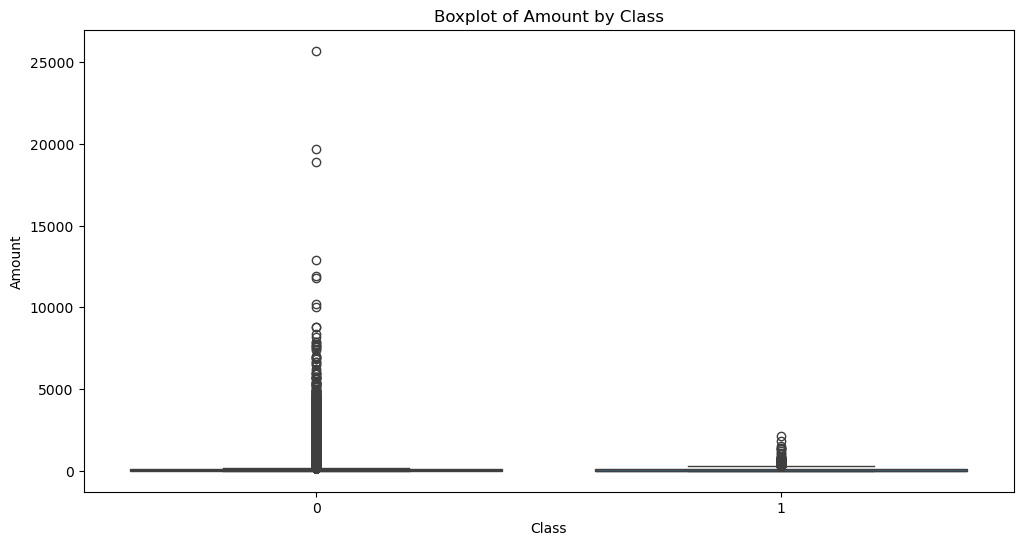

In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check for class imbalance
print(df['Class'].value_counts())

# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

## Class Distribution Analysis
Let's analyze the distribution of fraudulent and non-fraudulent transactions:

Class distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


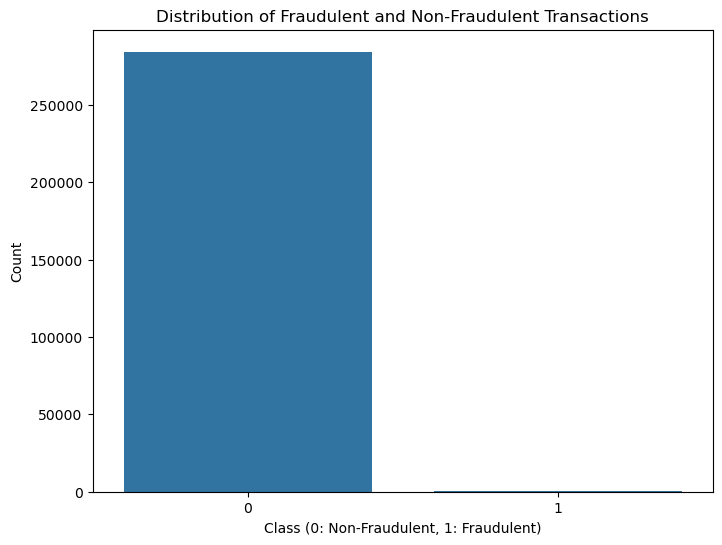

In [7]:
# Calculate class distribution
class_distribution = df['Class'].value_counts(normalize=True)
print("Class distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Class (0: Non-Fraudulent, 1: Fraudulent)")
plt.ylabel("Count")
plt.show()

## Feature Analysis<br>
Let's analyze the features of the dataset:

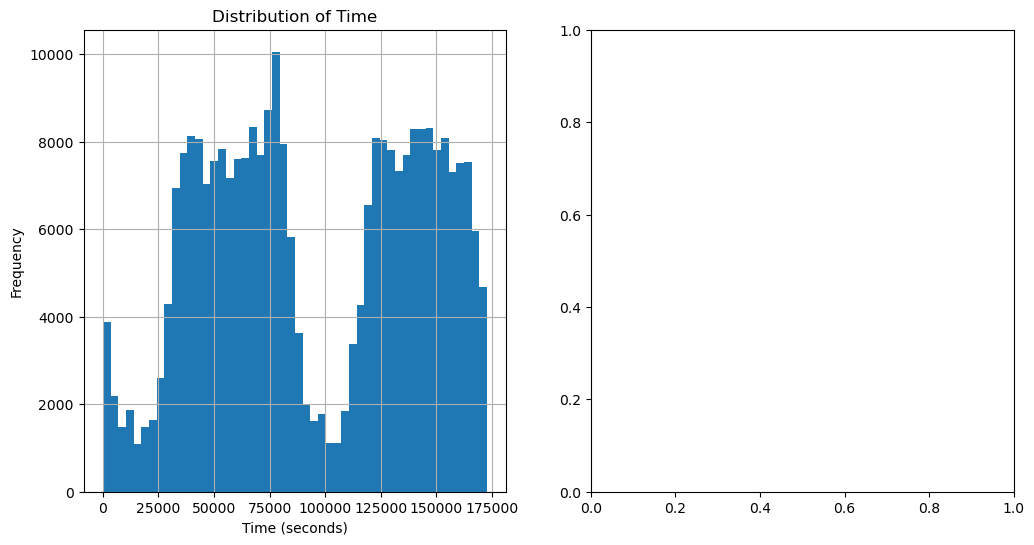

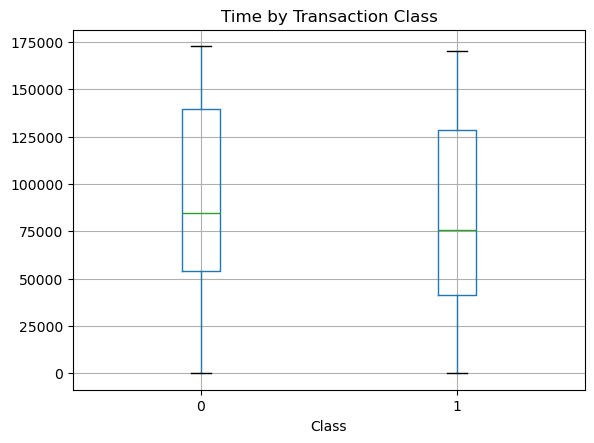

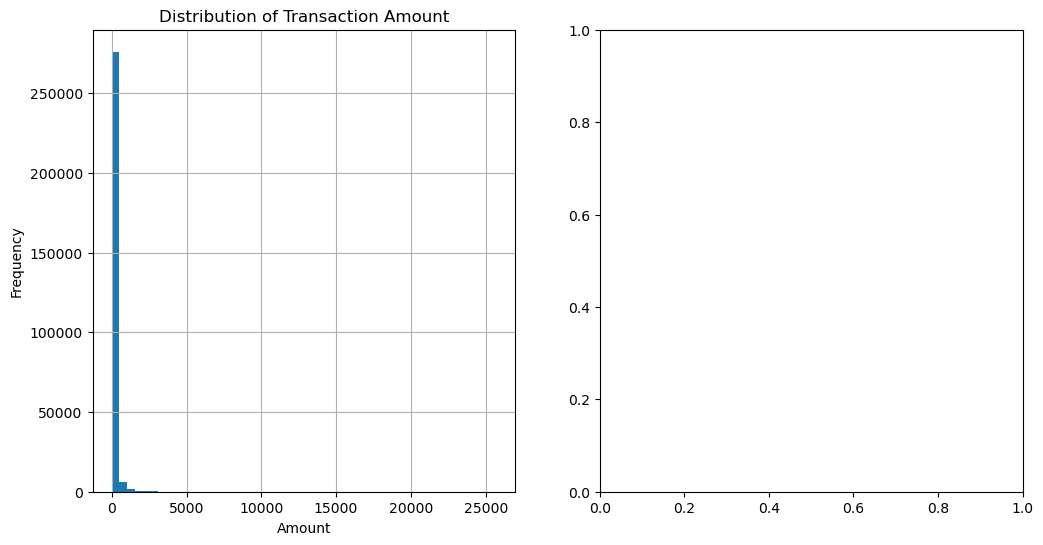

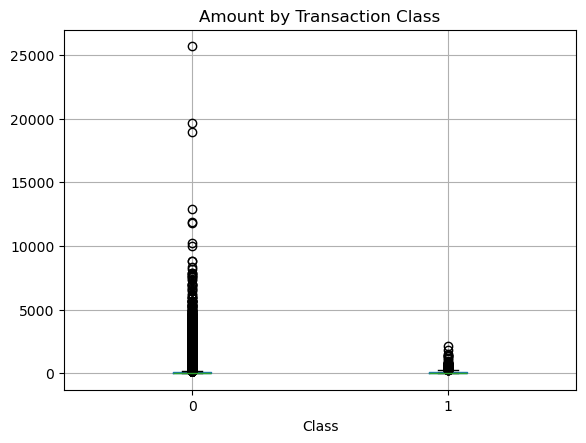

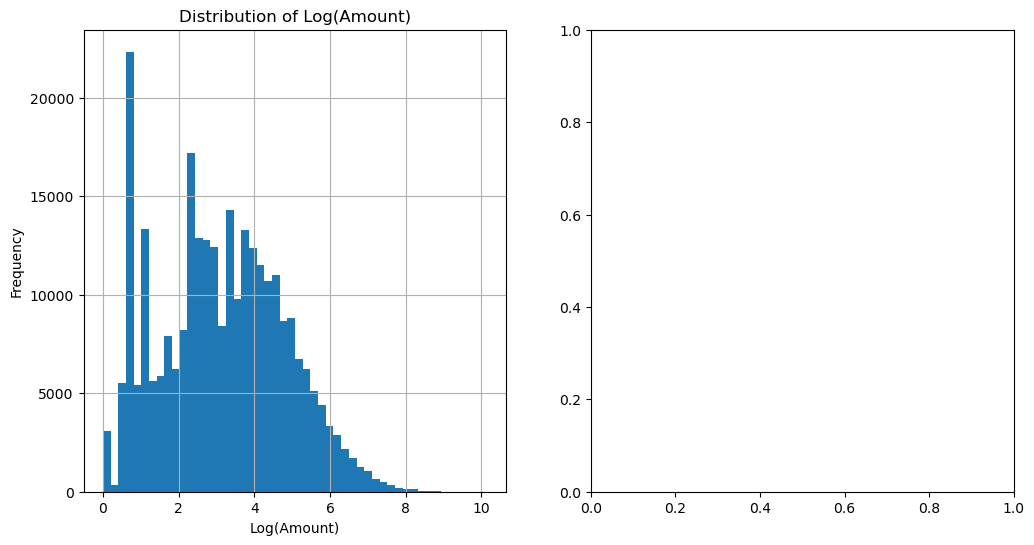

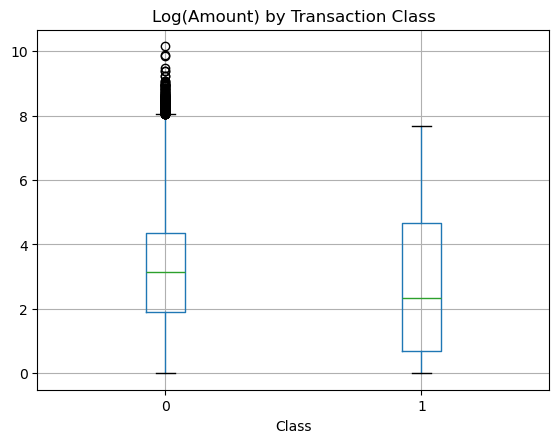

In [8]:
# Analyze 'Time' feature
plt.figure(figsize=(12, 6))
plt.subplot(121)
df['Time'].hist(bins=50)
plt.title("Distribution of Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")

plt.subplot(122)
df.boxplot(column='Time', by='Class')
plt.title("Time by Transaction Class")
plt.suptitle("")
plt.show()

# Analyze 'Amount' feature
plt.figure(figsize=(12, 6))
plt.subplot(121)
df['Amount'].hist(bins=50)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(122)
df.boxplot(column='Amount', by='Class')
plt.title("Amount by Transaction Class")
plt.suptitle("")
plt.show()

# Log transform of Amount
df['LogAmount'] = np.log(df['Amount'] + 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
df['LogAmount'].hist(bins=50)
plt.title("Distribution of Log(Amount)")
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")

plt.subplot(122)
df.boxplot(column='LogAmount', by='Class')
plt.title("Log(Amount) by Transaction Class")
plt.suptitle("")
plt.show()

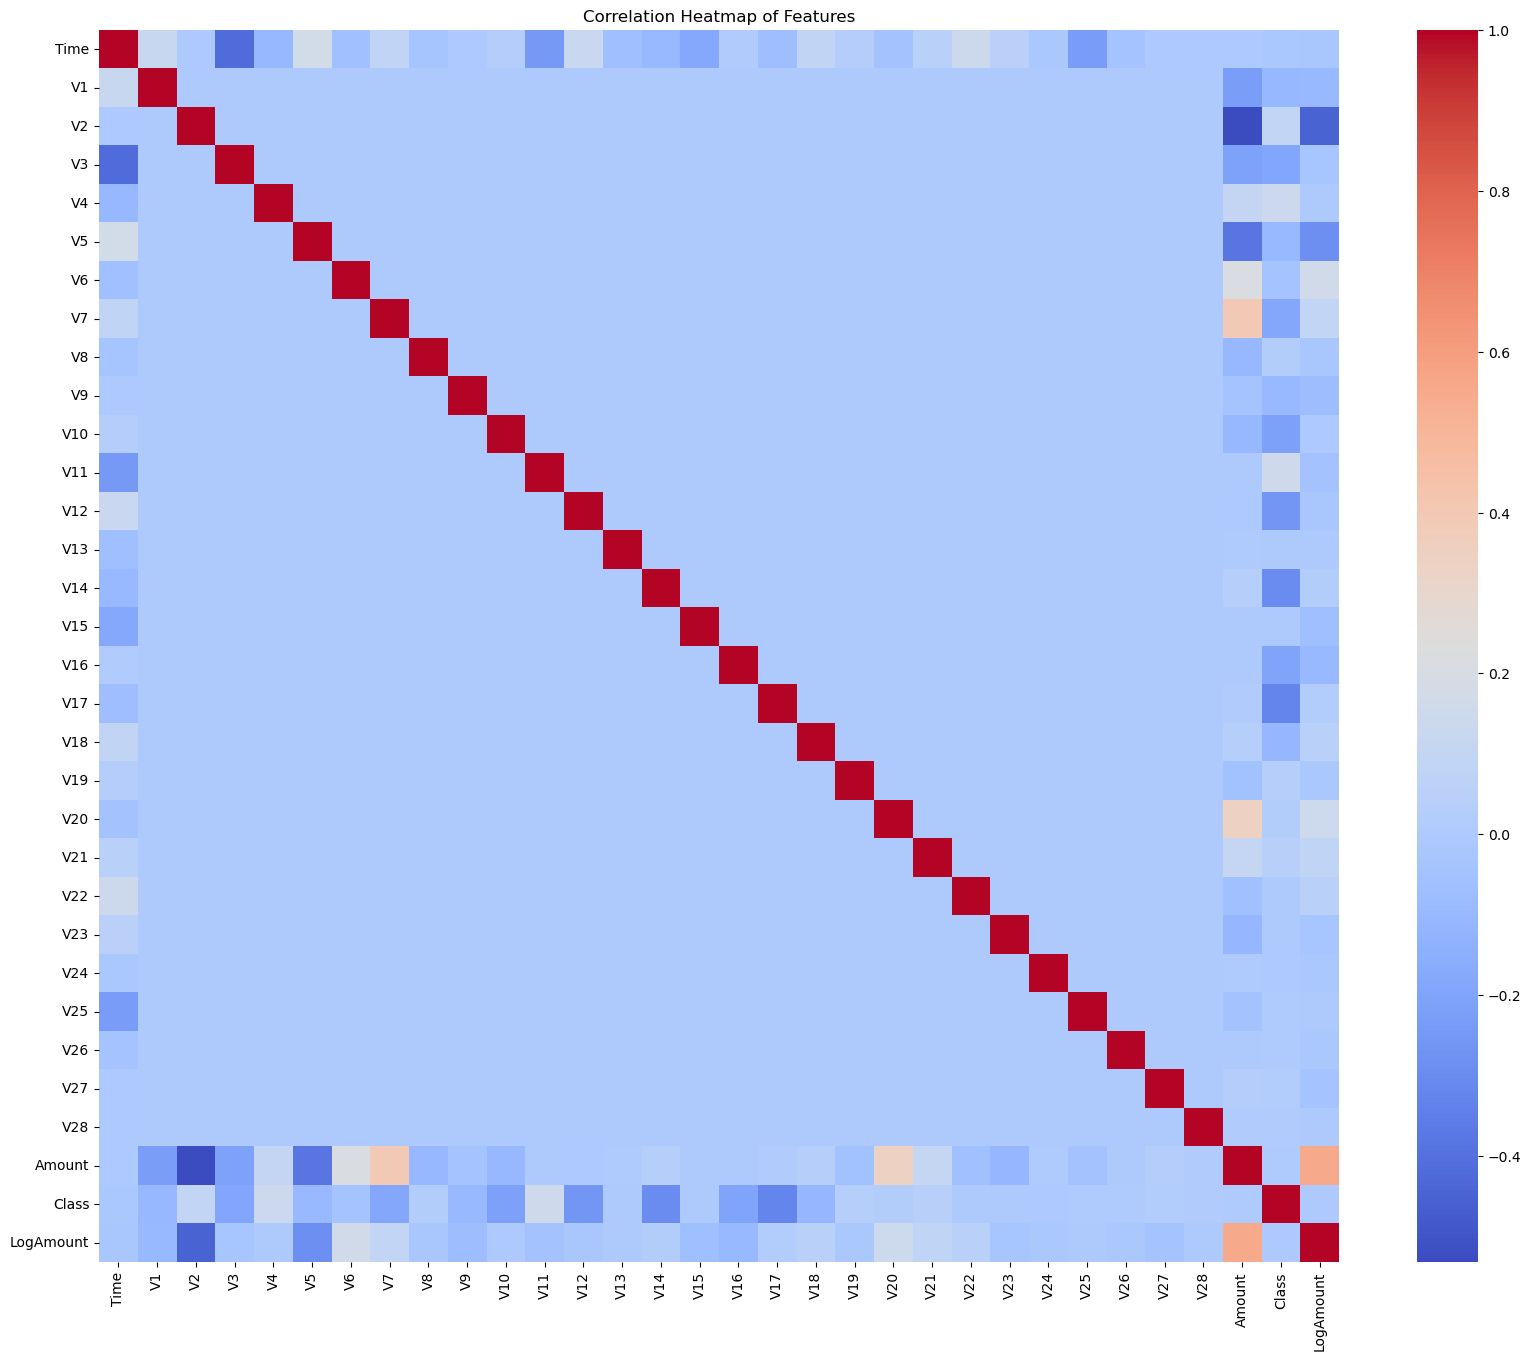

Top 10 correlated features with Class:
Class    1.000000
V17     -0.326481
V14     -0.302544
V12     -0.260593
V10     -0.216883
V16     -0.196539
V3      -0.192961
V7      -0.187257
V11      0.154876
V4       0.133447
V18     -0.111485
Name: Class, dtype: float64


In [9]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

# Find top correlated features with the target variable
top_corr = corr_matrix['Class'].sort_values(key=abs, ascending=False)
print("Top 10 correlated features with Class:")
print(top_corr[:11])  # 11 because 'Class' itself will be included

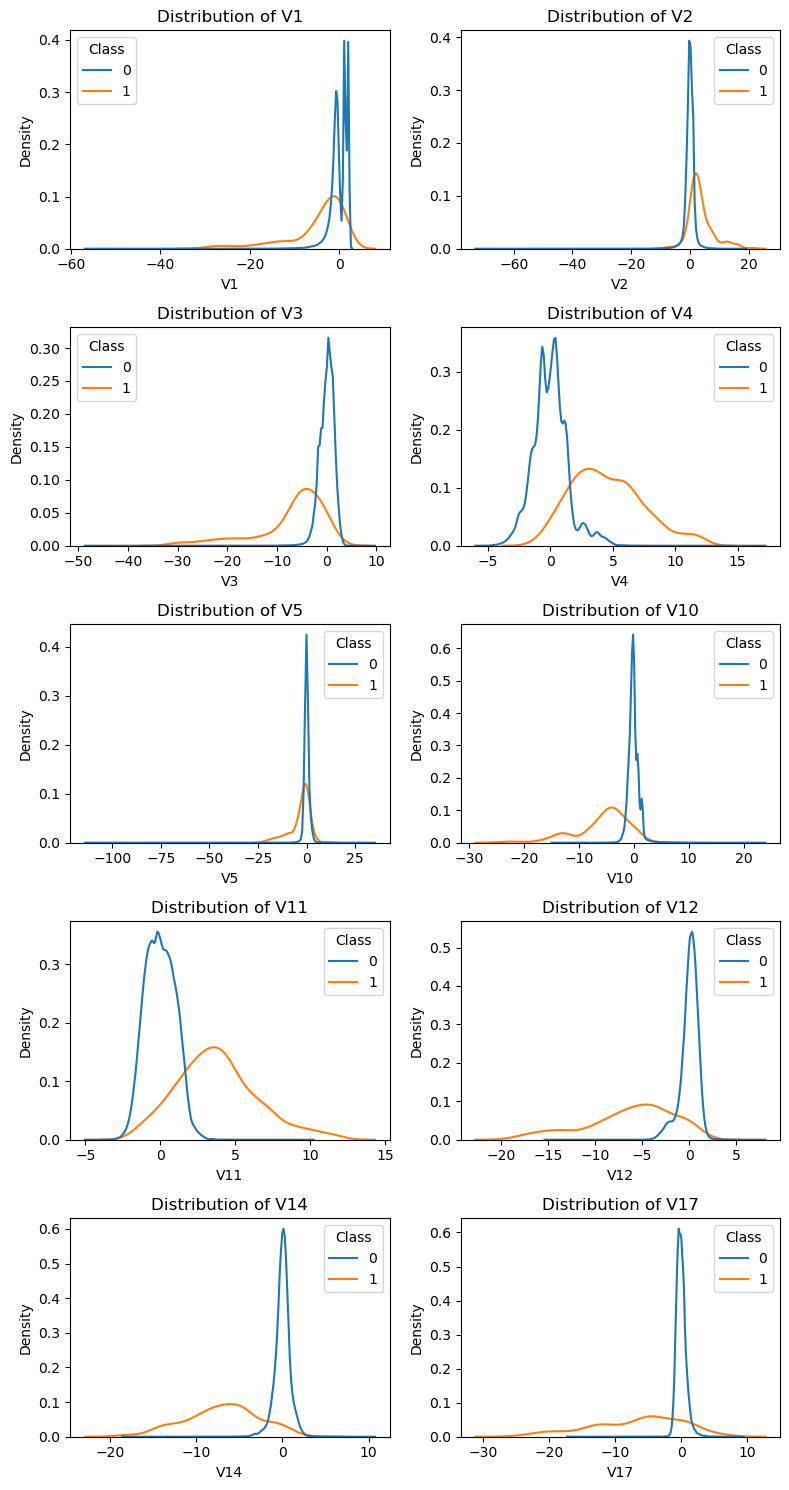

In [10]:
def plot_feature_distributions(df, features, n_rows, n_cols):
    plt.figure(figsize=(n_cols*4, n_rows*3))
    for i, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.kdeplot(data=df, x=feature, hue='Class', common_norm=False)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Select a subset of features to visualize
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V10', 'V11', 'V12', 'V14', 'V17']
plot_feature_distributions(df, selected_features, 5, 2)

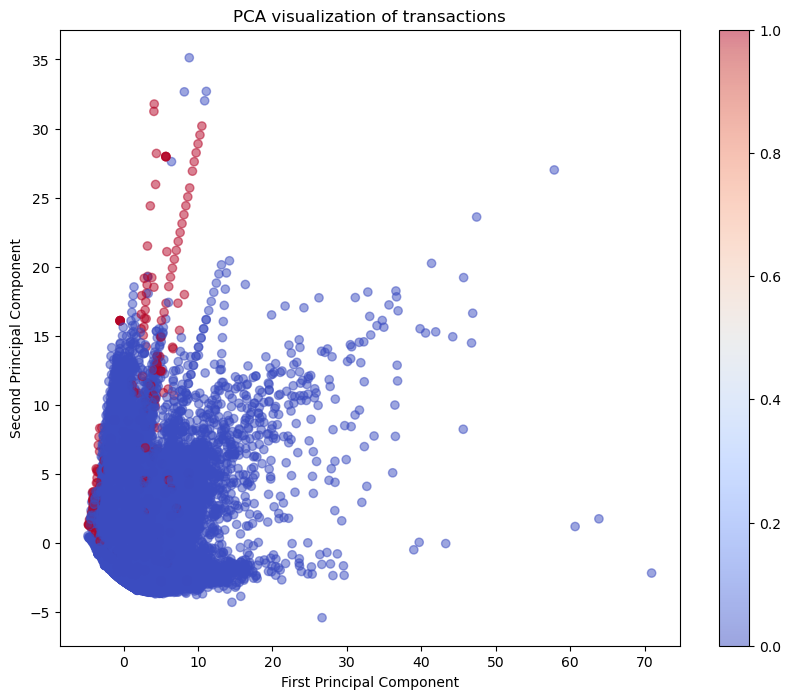

Explained variance ratio: [0.12714878 0.11135133]


In [12]:
from sklearn.decomposition import PCA

# Prepare data for PCA
X = df.drop(['Class', 'Time', 'Amount'], axis=1)
y = df['Class']

# Perform PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter)
plt.title('PCA visualization of transactions')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")